# DAY 1 
## COST FUNCTION

In [578]:
import numpy as np
import matplotlib.pyplot as plt

In [611]:
# Dataset

m = 50 # Numnbers of Example
n = 2 # Numbers Of Features (including Bais)
X = np.array(range(m)).reshape(-1,1)
Y = np.array(range(m)).reshape(-1,1)
theta = np.random.random((n,1))

$ Y = {\theta}_0 * X_0 + {\theta}_1 * X_1   $

$ X_0 = 1 $

In [612]:
# Adding bais X(0) Value in X  

Xnew = np.insert(X,0,1,axis=1)

$ h_{\theta} = X * {\theta} $

In [613]:
# Initial Prediction Of Y (with out Training)

h = Xnew.dot(theta)

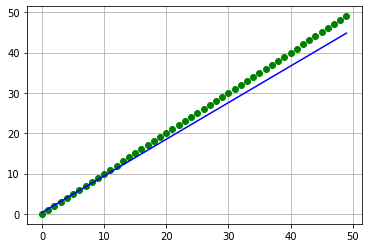

In [614]:
# Plot Data into 2D scatter Plot (initial Observation)

plt.figure(1)
plt.plot(X,Y,'go')
plt.plot(X,h,'b')
plt.grid(True)

# Cost Function For Regression Model

$ Cost=  1 / (2*m) \sum \limits _{i=1} ^{m} {(h_{\theta}(x ^i) - y ^i)}^2 $

In [615]:
# Step By Step Solution

$ error = h_{\theta} - Y $ 

$ sqrError = {error} ^2  $

$ sumOfError = \sum \limits_{i=1} ^{m} {sqrError}^i $

$ Cost = 1/(2*m) * sumOfError $

In [616]:
def Cost_function(X,Y,h):
    error = h - Y
    sqr_error = np.square(error)
    sum_Of_error = np.sum(sqr_error)
    return 1/(2*m) * sum_Of_error

In [617]:
# Value Of Cost Function Define Accuraccy of Hypothesis' Fucntion
# More Closer to 0, More Better and accurate Value of Theta we have
# Our main Goal is minimize this Cost Function By using Gradient Descenet Algorithm 

Cost_function(X,Y,h)

2.7303681520993814

In [618]:
# Why we use mean 1/2 term in this Cost Function ?
# The mean 1/2 as a convinence for the computing of gradient descent 
# as the derivation term of the square function will cencel out the 1/2 term

In [619]:
# Why We can't us Absolute Error instead of Squared Error ?
# Gradient is not continous, because the absolute function has not derivate at level 0

# Graph Of Cost Fucntion Vs. Different Theta Values

#### This is the Graph of Theta_1 vs Cost (Assume Theta_0 is set to be 0)

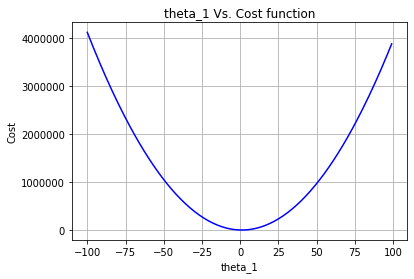

In [620]:
theta_copy = np.copy(theta)
theta_copy[0] = 0
J = []
# Xnorm = (X-np.average(X))/np.std(X)
# Xnorm = np.insert(Xnorm,0,1,axis=1)
for i in range(-100,100):
    theta_copy[1] = i
#     h_error = Xnorm.dot(theta_copy)
    h_error = Xnew.dot(theta_copy)
    J.append(Cost_function(X,Y,h_error))
    
# Cost Function Vs. Theta1 Graph

theta_1 = np.array(range(-100,100)).reshape(-1,1)
plt.figure(1)
plt.plot(theta_1,J,'b')
plt.xlabel('theta_1')
plt.ylabel('Cost')
plt.title('theta_1 Vs. Cost function')
plt.grid(True)

#### This is the Graph of Theta vs Cost (In this Graph both theta_0 and Theta_1 is included)

In [625]:
# Import For 3D Graph
from mpl_toolkits import mplot3d

t1 = np.array(range(-100,100)).reshape(-1,1)
t2 = np.array(range(-100,100)).reshape(-1,1)

Xnorm = (X-np.average(X))/np.std(X)
Xnorm = np.insert(Xnorm,0,1,axis=1)

J_3D = []
theta_new = np.copy(theta)
for i in range(200):
    theta_new[0] = t1[i]
    theta_new[1] = t2[i]
    h_error = Xnorm.dot(theta_copy)
    J_3D.append(Cost_function(X,Y,h_error))
    
    
T1,T2 = np.meshgrid(t1,t2)
J = np.meshgrid(J_3D,J_3D)
J = np.array(J)
Ja = J[0]
Ja = J[1]

In [ ]:
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot_surface(T1, T2, Ja, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.title('theta Vs. Cost function')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost');
ax.view_init(30, 20)

In [591]:
# Note Both Graphs have Bow (Convex) function It's mean it's only contain Global miniumum
# Our Gaol is to find global minimum of the Cost Function using Gradient DDesccent